# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
print(cities)

['avarua', 'olonkinbyen', 'edinburgh of the seven seas', 'grytviken', 'ciudad sabinas hidalgo', 'heze', "port saint john's", 'qaqortoq', 'waitangi', 'hermanus', 'iskateley', 'taiohae', 'georgetown', 'mbaiki', 'hawaiian paradise park', 'invercargill', 'puerto natales', 'iqaluit', 'ushuaia', 'sitia', 'blackmans bay', 'ras gharib', 'thompson', 'kodiak', 'jamestown', 'sainte-rose', 'port-aux-francais', 'college', 'bilibino', 'kingston', 'klyuchi', 'tokar', 'cuenca', 'talnakh', 'tondano', 'dampit', 'ondjiva', 'pirallahi', 'mossel bay', 'kayangel', 'dashitou', 'puerto ayora', 'port mathurin', 'quellon', 'sitka', 'papatowai', 'penzance', 'adamstown', 'corner brook', 'wailua homesteads', 'ancud', 'praya', 'nuuk', 'ribeira grande', 'es castell', 'tromso', 'cable beach', "ytyk-kyuyel'", 'ilulissat', 'luderitz', 'bethel', 'oodweyne', 'pacocha', 'at-bashi', 'vorgashor', 'am djarass', 'laojunmiao', 'port elizabeth', 'hell-ville', 'longyearbyen', 'lihue', 'enewetak', 'tahta', 'vila velha', 'singaraj

In [35]:
# Confused as to why temp_max is triple digits??

# city = cities[12]
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city_url = f"{url}appid={weather_api_key}&q={city}"
# city_weather = requests.get(city_url).json()
# print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 5.4112,
        "lon": 100.3354
    },
    "dt": 1698537516,
    "id": 1735106,
    "main": {
        "feels_like": 298.43,
        "humidity": 94,
        "pressure": 1009,
        "temp": 297.49,
        "temp_max": 299.79,
        "temp_min": 297.03
    },
    "name": "George Town",
    "sys": {
        "country": "MY",
        "id": 49151,
        "sunrise": 1698534240,
        "sunset": 1698577238,
        "type": 2
    },
    "timezone": 28800,
    "visibility": 9000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 1.54
    }
}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# city_url = f"{url}appid={weather_api_key}&q={cities[0]}"
# city_weather = requests.get(city_url).json()
# print(json.dumps(city_weather, indent=4, sort_keys=True))
# print(f"lat = {city_weather['coord']['lat']}")
# print(f"lon = {city_weather['coord']['lon']}")
# print(f"max temp = {city_weather['main']['temp_max']}")
# print(f"humidity = {city_weather['main']['humidity']}")
# print(f"clouds = {city_weather['clouds']['all']}")
# print(f"wind = {city_weather['wind']['speed']}")
# print(f"country = {city_weather['sys']['country']}")
# print(f"date = {city_weather['dt']}")

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    acity_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | ciudad sabinas hidalgo
Processing Record 6 of Set 1 | heze
Processing Record 7 of Set 1 | port saint john's
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | mbaiki
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | sitia
Processing Record 21 of Set 1 | blackmans 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,298.18,61,75,4.63,CK,1698534925
1,olonkinbyen,70.9221,-8.7187,272.62,71,99,2.60,SJ,1698535365
2,edinburgh of the seven seas,-37.0676,-12.3116,286.08,87,65,11.86,SH,1698535365
3,grytviken,-54.2811,-36.5092,275.47,94,93,4.71,GS,1698535365
4,ciudad sabinas hidalgo,26.5000,-100.1667,304.01,41,0,4.00,MX,1698535366


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,298.18,61,75,4.63,CK,1698534925
1,olonkinbyen,70.9221,-8.7187,272.62,71,99,2.60,SJ,1698535365
2,edinburgh of the seven seas,-37.0676,-12.3116,286.08,87,65,11.86,SH,1698535365
3,grytviken,-54.2811,-36.5092,275.47,94,93,4.71,GS,1698535365
4,ciudad sabinas hidalgo,26.5000,-100.1667,304.01,41,0,4.00,MX,1698535366


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

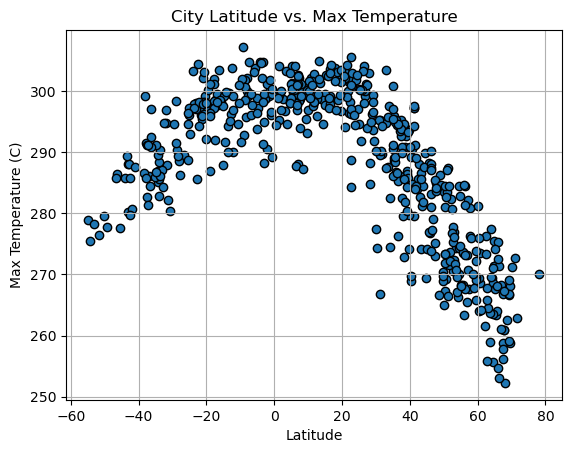

In [19]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

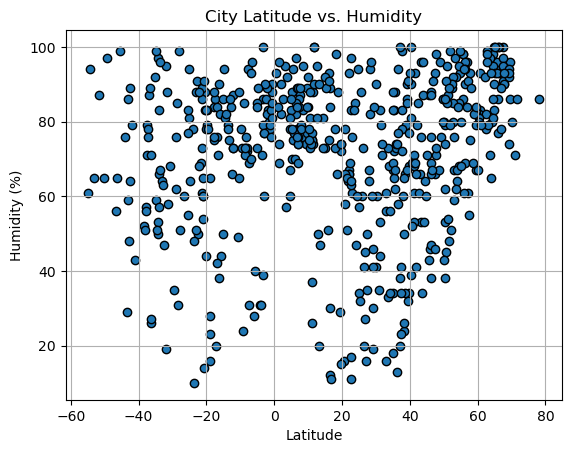

In [20]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

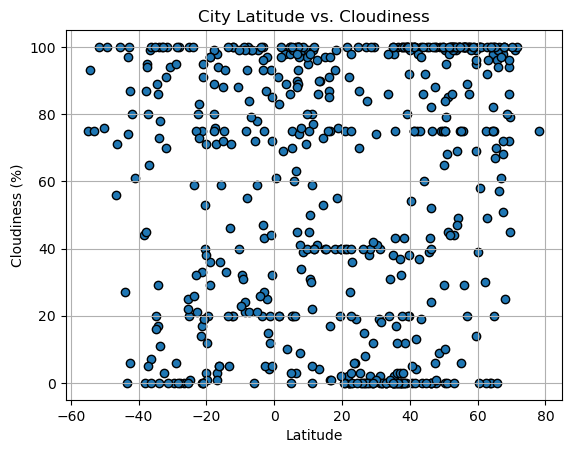

In [21]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

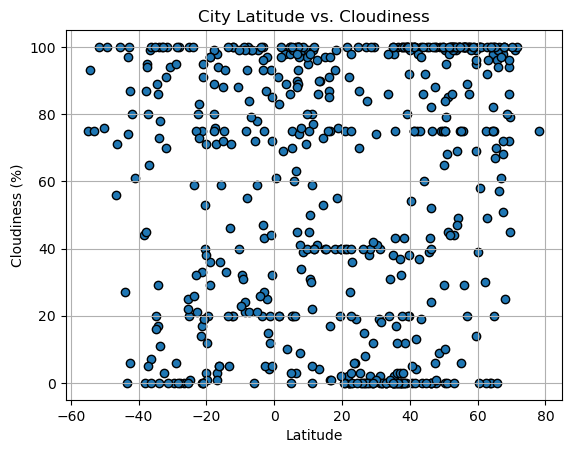

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

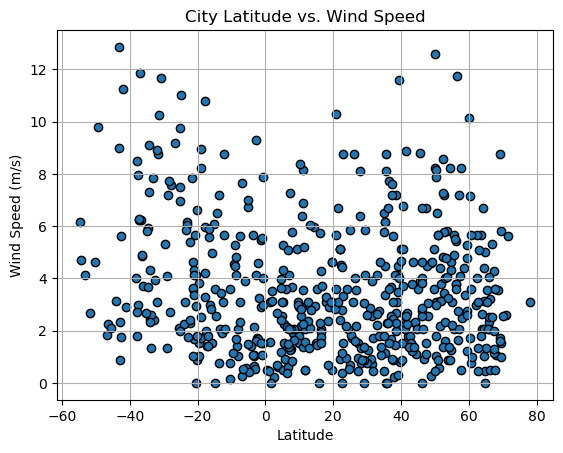

In [24]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_eq_x,line_eq_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,272.62,71,99,2.60,SJ,1698535365
4,ciudad sabinas hidalgo,26.5000,-100.1667,304.01,41,0,4.00,MX,1698535366
5,heze,35.2431,115.4411,288.56,72,0,3.35,CN,1698535366
7,qaqortoq,60.7167,-46.0333,273.46,83,58,0.76,GL,1698535366
10,iskateley,67.6803,53.1512,260.94,90,100,3.58,RU,1698535367


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,298.18,61,75,4.63,CK,1698534925
2,edinburgh of the seven seas,-37.0676,-12.3116,286.08,87,65,11.86,SH,1698535365
3,grytviken,-54.2811,-36.5092,275.47,94,93,4.71,GS,1698535365
6,port saint john's,-31.6229,29.5448,287.89,88,100,8.75,ZA,1698535122
8,waitangi,-43.9535,-176.5597,285.83,76,27,3.13,NZ,1698535367


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7609428996140543


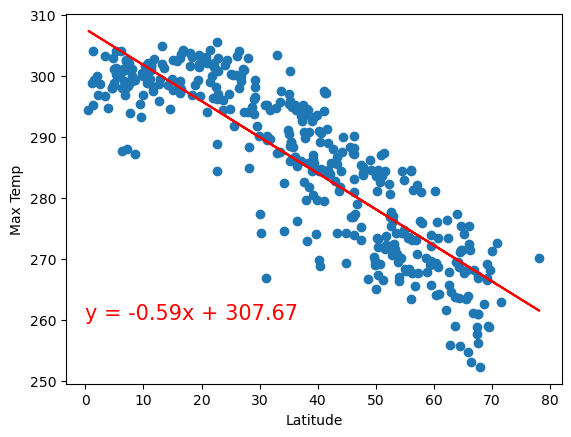

In [50]:
# Linear regression on Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",0,260)

The r-squared is: 0.5585243337094815


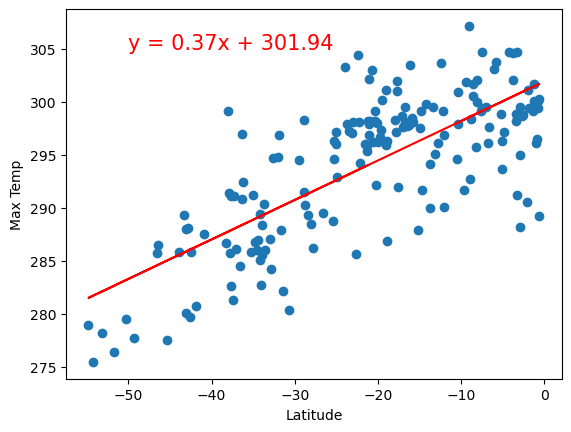

In [51]:
# Linear regression on Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-50,305)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03388652973082336


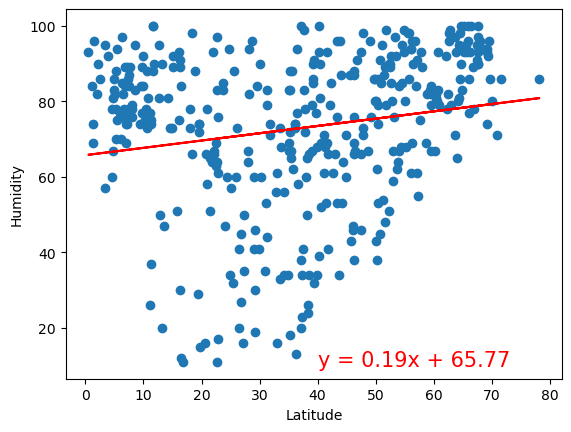

In [55]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",40,10)

The r-squared is: 0.010690976205212912


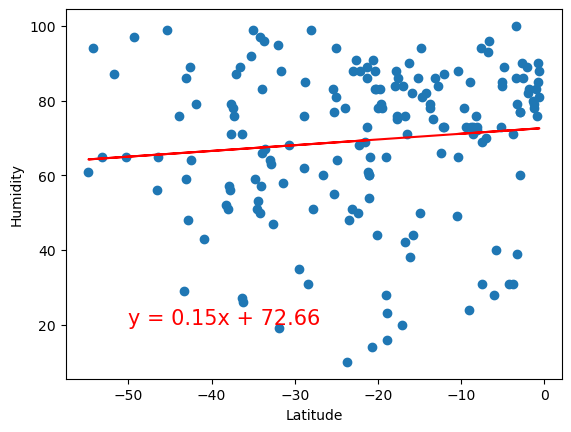

In [57]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03168264707586563


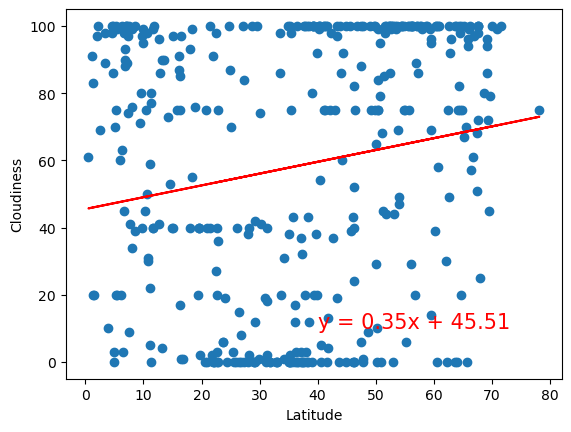

In [59]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,10)

The r-squared is: 0.005188161793366639


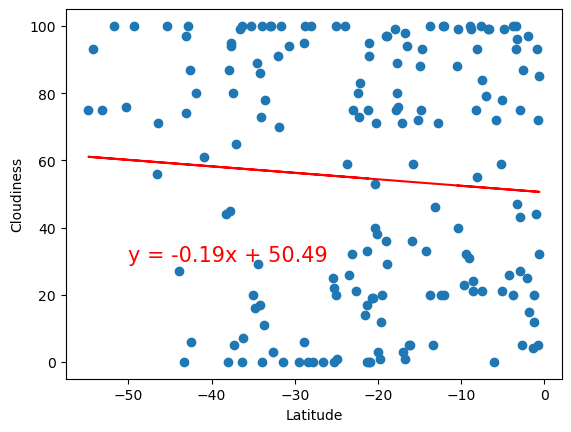

In [62]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.017799419332667737


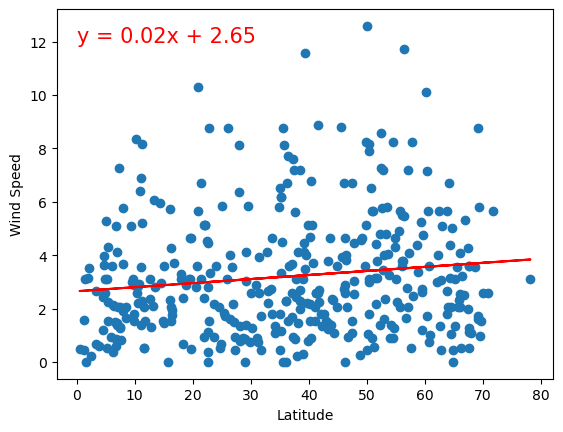

In [65]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",0,12)

The r-squared is: 0.07923010013051027


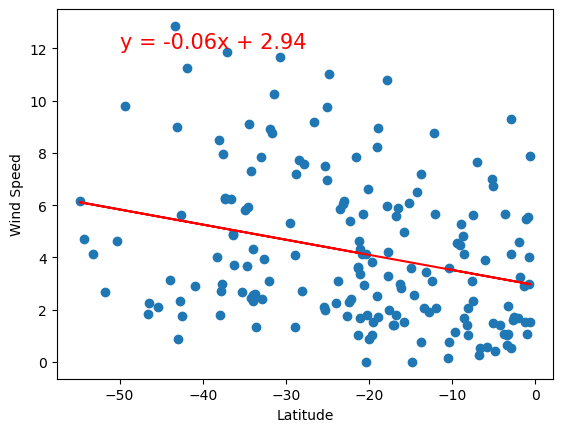

In [67]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-50,12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE